In [1]:
from code.utils import *

In [2]:
from utils import *

In [3]:
from utils import *
from model import *
from train import *

import os 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np 
import logging 
import wandb 
from termcolor import colored

In [4]:
args = CONFIG()
args.epoch

In [5]:
class CONFIG:
    epoch = 100

In [6]:
args = CONFIG()
args.epoch

100

In [7]:
args = CONFIG()


def get_model(args, input_dim):
    if args.model == 'MLP':
        model = MLPAutoEncoder(input_dim)
    elif args.model == 'CNN':
        model = CNNAutoEncoder(input_dim, )
    else:
        raise ValueError('Invalid model name')
    return model


def get_data(args):
    raise NotImplementedError

def make(args):
    # seed everything
    seed_everything(3407)
    
    # load data 
    Data = sio.loadmat('data/physical/CYLINDER.mat')
    U = Data['U']
    V = Data['V']
    VORTALL = Data['VORTALL']
    X = Data['X']
    Y = Data['Y']
    Dx = Data['dx'].item()  
    Dy = Data['dy'].item()
    nx = Data['nx'].item()
    ny = Data['ny'].item()
    print(colored("Load data successfully", 'green'))
    
    
    # print input shape 
    print(colored(f'Input shape: {U.shape}'))
    
    
    # define configs
    if args.model == 'MLP':
        input_dim = U.shape[1]
    else:
        input_dim = 1 # should be NCHW, where c = 1
    
    
    #with wandb.init(project='10617project', config=args) as run: 
        
    # get device 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # get model
    model = get_model(args, input_dim)
    print(colored(f'Load model successfully! Using model: {args.model}', 'green'))
    print(colored("Model architecture: ", 'green'))
    print(model)
    
    # create dataset
    if args.model == 'MLP':
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    elif args.model == 'CNN':
        U = U.reshape(nx, ny, -1, 1).transpose(2, 3, 0, 1)
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    print(colored(f'Create dataset successfully! Train dataset size: {len(train_dataset)}, Test dataset size: {len(test_dataset)}', 'green'))
    
    # create dataloader
    train_loader, test_loader = make_dataloader(train_dataset, test_dataset, args.batch_size)
    print(colored(f'Create dataloader successfully! Train dataloader size: {len(train_loader)}, Test dataloader size: {len(test_loader)}', 'green'))
    
    # train model 
    optim = torch.optim.AdamW(model.parameters(), lr=args.lr)
    criterion = nn.MSELoss() # input and target should be the same shape
    logging.info(f"Start training model {args.model} using device {device}")
    trained_model, train_losses, val_losses = train(model, optim, criterion, train_loader, test_loader,  args.epochs, device, wandb_logging=args.wandb)
    
    # plot reconstruction results 
    plot_loss(train_losses, val_losses, title=f'Loss for {args.model}')

In [8]:
make(args)

In [9]:
from utils import *
from model import *
from train import *

import os 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np 
import logging 
import wandb 
from termcolor import colored

import scipy.io as sio
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s :: %(levelname)s :: %(message)s')

In [10]:
class CONFIG:
    epochs = 10
    batch_size = 128
    lr = 0.001
    model = 'CNN'
    wandb = True

In [11]:
args = CONFIG()


def get_model(args, input_dim):
    if args.model == 'MLP':
        model = MLPAutoEncoder(input_dim)
    elif args.model == 'CNN':
        model = CNNAutoEncoder(input_dim, )
    else:
        raise ValueError('Invalid model name')
    return model


def get_data(args):
    raise NotImplementedError

def make(args):
    # seed everything
    seed_everything(3407)
    
    # load data 
    Data = sio.loadmat('data/physical/CYLINDER.mat')
    U = Data['U']
    V = Data['V']
    VORTALL = Data['VORTALL']
    X = Data['X']
    Y = Data['Y']
    Dx = Data['dx'].item()  
    Dy = Data['dy'].item()
    nx = Data['nx'].item()
    ny = Data['ny'].item()
    print(colored("Load data successfully", 'green'))
    
    
    # print input shape 
    print(colored(f'Input shape: {U.shape}'))
    
    
    # define configs
    if args.model == 'MLP':
        input_dim = U.shape[1]
    else:
        input_dim = 1 # should be NCHW, where c = 1
    
    
    #with wandb.init(project='10617project', config=args) as run: 
        
    # get device 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # get model
    model = get_model(args, input_dim)
    print(colored(f'Load model successfully! Using model: {args.model}', 'green'))
    print(colored("Model architecture: ", 'green'))
    print(model)
    
    # create dataset
    if args.model == 'MLP':
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    elif args.model == 'CNN':
        U = U.reshape(nx, ny, -1, 1).transpose(2, 3, 0, 1)
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    print(colored(f'Create dataset successfully! Train dataset size: {len(train_dataset)}, Test dataset size: {len(test_dataset)}', 'green'))
    
    # create dataloader
    train_loader, test_loader = make_dataloader(train_dataset, test_dataset, args.batch_size)
    print(colored(f'Create dataloader successfully! Train dataloader size: {len(train_loader)}, Test dataloader size: {len(test_loader)}', 'green'))
    
    # train model 
    optim = torch.optim.AdamW(model.parameters(), lr=args.lr)
    criterion = nn.MSELoss() # input and target should be the same shape
    logging.info(f"Start training model {args.model} using device {device}")
    trained_model, train_losses, val_losses = train(model, optim, criterion, train_loader, test_loader,  args.epochs, device, wandb_logging=args.wandb)
    
    # plot reconstruction results 
    plot_loss(train_losses, val_losses, title=f'Loss for {args.model}')

In [12]:
make(args)

In [13]:
args = CONFIG()


def get_model(args, input_dim):
    if args.model == 'MLP':
        model = MLPAutoEncoder(input_dim)
    elif args.model == 'CNN':
        model = CNNAutoEncoder(input_dim, )
    else:
        raise ValueError('Invalid model name')
    return model


def get_data(args):
    raise NotImplementedError

def make(args):
    # seed everything
    seed_everything(3407)
    
    # load data 
    Data = sio.loadmat('../data/physical/CYLINDER.mat')
    U = Data['U']
    V = Data['V']
    VORTALL = Data['VORTALL']
    X = Data['X']
    Y = Data['Y']
    Dx = Data['dx'].item()  
    Dy = Data['dy'].item()
    nx = Data['nx'].item()
    ny = Data['ny'].item()
    print(colored("Load data successfully", 'green'))
    
    
    # print input shape 
    print(colored(f'Input shape: {U.shape}'))
    
    
    # define configs
    if args.model == 'MLP':
        input_dim = U.shape[1]
    else:
        input_dim = 1 # should be NCHW, where c = 1
    
    
    #with wandb.init(project='10617project', config=args) as run: 
        
    # get device 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # get model
    model = get_model(args, input_dim)
    print(colored(f'Load model successfully! Using model: {args.model}', 'green'))
    print(colored("Model architecture: ", 'green'))
    print(model)
    
    # create dataset
    if args.model == 'MLP':
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    elif args.model == 'CNN':
        U = U.reshape(nx, ny, -1, 1).transpose(2, 3, 0, 1)
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    print(colored(f'Create dataset successfully! Train dataset size: {len(train_dataset)}, Test dataset size: {len(test_dataset)}', 'green'))
    
    # create dataloader
    train_loader, test_loader = make_dataloader(train_dataset, test_dataset, args.batch_size)
    print(colored(f'Create dataloader successfully! Train dataloader size: {len(train_loader)}, Test dataloader size: {len(test_loader)}', 'green'))
    
    # train model 
    optim = torch.optim.AdamW(model.parameters(), lr=args.lr)
    criterion = nn.MSELoss() # input and target should be the same shape
    logging.info(f"Start training model {args.model} using device {device}")
    trained_model, train_losses, val_losses = train(model, optim, criterion, train_loader, test_loader,  args.epochs, device, wandb_logging=args.wandb)
    
    # plot reconstruction results 
    plot_loss(train_losses, val_losses, title=f'Loss for {args.model}')

In [14]:
make(args)

In [15]:
args = CONFIG()


def get_model(args, input_dim):
    if args.model == 'MLP':
        model = MLPAutoEncoder(input_dim)
    elif args.model == 'CNN':
        model = CNNAutoEncoder(input_dim, )
    else:
        raise ValueError('Invalid model name')
    return model


def get_data(args):
    raise NotImplementedError

def make(args):
    # seed everything
    seed_everything(3407)
    
    # load data 
    Data = sio.loadmat('../data/physical/CYLINDER.mat')
    U = Data['U']
    V = Data['V']
    VORTALL = Data['VORTALL']
    X = Data['X']
    Y = Data['Y']
    Dx = Data['dx'].item()  
    Dy = Data['dy'].item()
    nx = Data['nx'].item()
    ny = Data['ny'].item()
    print(colored("Load data successfully", 'green'))
    
    
    # print input shape 
    print(colored(f'Input shape: {U.shape}'))
    
    
    # define configs
    if args.model == 'MLP':
        input_dim = U.shape[1]
    else:
        input_dim = 1 # should be NCHW, where c = 1
    
    if args.wandb:
        run = wandb.init(project='10617project', config=args)
    else :
        run = None
        
    # get device 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # get model
    model = get_model(args, input_dim)
    print(colored(f'Load model successfully! Using model: {args.model}', 'green'))
    print(colored("Model architecture: ", 'green'))
    print(model)
    
    # create dataset
    if args.model == 'MLP':
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    elif args.model == 'CNN':
        U = U.reshape(nx, ny, -1, 1).transpose(2, 3, 0, 1)
        train_dataset, test_dataset = make_dataset(U, test_size=0.2)
    print(colored(f'Create dataset successfully! Train dataset size: {len(train_dataset)}, Test dataset size: {len(test_dataset)}', 'green'))
    
    # create dataloader
    train_loader, test_loader = make_dataloader(train_dataset, test_dataset, args.batch_size)
    print(colored(f'Create dataloader successfully! Train dataloader size: {len(train_loader)}, Test dataloader size: {len(test_loader)}', 'green'))
    
    # train model 
    optim = torch.optim.AdamW(model.parameters(), lr=args.lr)
    criterion = nn.MSELoss() # input and target should be the same shape
    logging.info(f"Start training model {args.model} using device {device}")
    trained_model, train_losses, val_losses = train(model, optim, criterion, train_loader, test_loader,  args.epochs, device, wandb_logging=args.wandb)
    
    # plot reconstruction results 
    plot_loss(train_losses, val_losses, title=f'Loss for {args.model}')
    
    #finish wandb
    if args.wandb:
        wandb.finish()

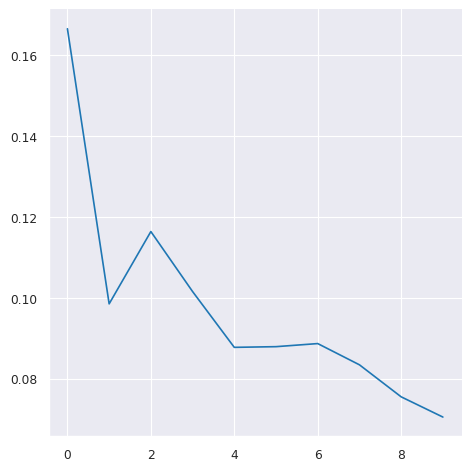

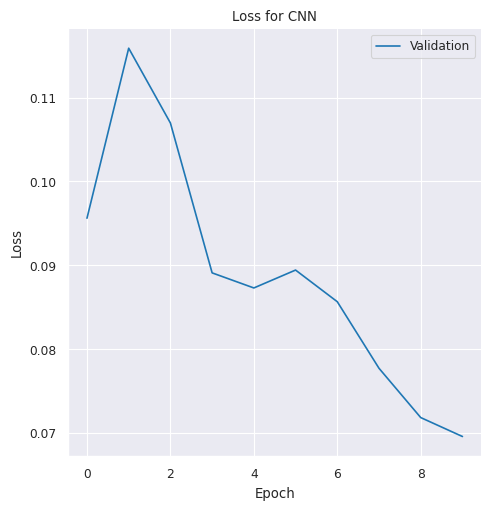

In [16]:
make(args)